In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
import numpy as np


%matplotlib inline

In [1]:
!pip3 install torch

  Using cached torch-2.3.1-cp310-cp310-win_amd64.whl.metadata (26 kB)
  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.6.0-py3-none-any.whl.metadata (11 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
Using cached torch-2.3.1-cp310-cp310-win_amd64.whl (159.8 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached filelock-3.15.4-py3-none-any.whl (16 kB)
Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)


In [2]:
!pip3 install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --------------- ------------------------ 102.4/258.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 3.9 MB/s eta 0:00:00


In [2]:
#Read the data
credit_data = pd.read_excel('CreditCardDataset.xlsx')

In [3]:
#Display the data
credit_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
5,18,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,2.28,0
6,22,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
7,23,-0.414289,0.905437,1.727453,1.473471,0.007443,-0.200331,0.740228,-0.029247,-0.593392,...,0.077237,0.457331,-0.038500,0.642522,-0.183891,-0.277464,0.182687,0.152665,33.00,0
8,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
9,29,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0


In [4]:
#Obtain the shape of the data
credit_data.shape

(57355, 31)

In [5]:
#Calculate the mean, frequency, min, max and standard deviation.
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


### Since we are going to predict whether the transaction is fraud(class 1) or not(class 0), we are going to plot the distribution of 'Class'

<Axes: xlabel='Class', ylabel='Count'>

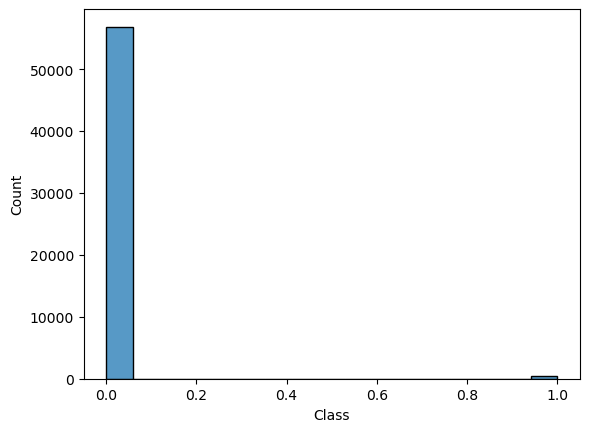

In [6]:
sb.histplot(data=credit_data, x='Class')

In [7]:
credit_data['Class'].value_counts()

Class
0    56863
1      492
Name: count, dtype: int64

### Observation: We can see a class imbalance here i.e The positive class(frauds) account for 17.2% of all the transaction. If we use this dataset for further prediciton, we might get a lot of errors and our algorithms will probably overfit since it will assume that most of the transactions are not fraud. We should avoid this and want our model to detect patterns that give signs of fraud.

In [8]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Observation: There are no missing values in the dataset.

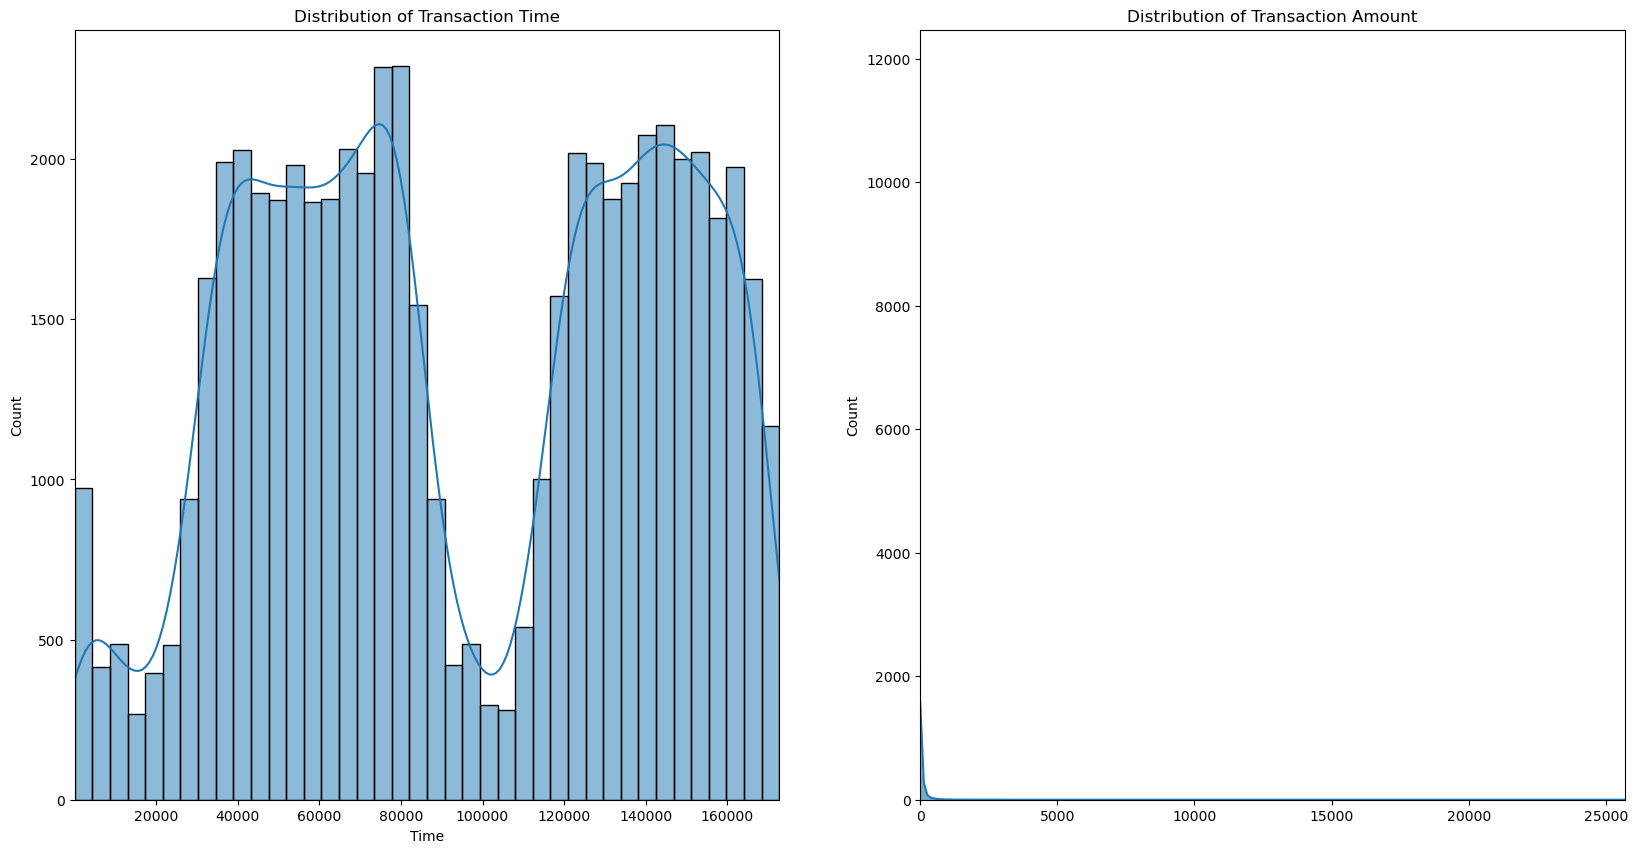

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
time_values = credit_data['Time']
amount_values = credit_data['Amount'].values

sb.histplot(time_values, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlim([min(time_values), max(time_values)])

sb.histplot(amount_values, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlim([min(amount_values), max(amount_values)])

plt.show()

### Observation: As can be seen in the above plots, Time and Account are not normally distributed and should be scaled as the other columns.

### Scaling Time and Amount columns

In [10]:
rs = RobustScaler()
credit_data['Time'] = rs.fit_transform(credit_data['Time'].values.reshape(-1,1))
credit_data['Amount'] = rs.fit_transform(credit_data['Amount'].values.reshape(-1,1))

In [11]:
credit_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.993456,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.672034,0
1,-0.993456,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256493,0
2,-0.993398,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.263353,0
3,-0.993351,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.077144,0
4,-0.993339,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,-0.084004,0
5,-0.993269,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,-0.275954,0
6,-0.993222,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,-0.295415,0
7,-0.993210,-0.414289,0.905437,1.727453,1.473471,0.007443,-0.200331,0.740228,-0.029247,-0.593392,...,0.077237,0.457331,-0.038500,0.642522,-0.183891,-0.277464,0.182687,0.152665,0.154148,0
8,-0.993175,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,-0.283094,0
9,-0.993139,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,-0.216311,0


### Oversampling minority class using SMOTE(Synthetic Minority Oversampling Technique)

In [12]:
X = credit_data.drop('Class', axis=1)
Y = credit_data['Class']

In [13]:
X.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.993456,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.672034
1,-0.993456,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256493
2,-0.993398,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.263353
3,-0.993351,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.077144
4,-0.993339,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,-0.084004
5,-0.993269,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,-0.307169,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,-0.275954
6,-0.993222,-1.946525,-0.044901,-0.405570,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,...,-0.216715,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,-0.295415
7,-0.993210,-0.414289,0.905437,1.727453,1.473471,0.007443,-0.200331,0.740228,-0.029247,-0.593392,...,0.097308,0.077237,0.457331,-0.038500,0.642522,-0.183891,-0.277464,0.182687,0.152665,0.154148
8,-0.993175,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,-0.283094
9,-0.993139,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,...,-0.190120,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,-0.216311


In [14]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [16]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X_train, Y_train.to_numpy())

In [17]:
print('Before Oversampling:')
print('Count of label 0: {}'.format(sum(Y_train == 0)))
print('Count of label 1: {}'.format(sum(Y_train == 1)))

Before Oversampling:
Count of label 0: 34106
Count of label 1: 307


In [18]:
print('After Oversampling:')
print('Count of label 0: {}'.format(sum(oversampled_Y == 0)))
print('Count of label 1: {}'.format(sum(oversampled_Y == 1)))

After Oversampling:
Count of label 0: 34106
Count of label 1: 34106


### Observation: SMOTE algorithm has oversampled the minority class (Fraud) instances and made it equal to majority class (No Fraud). Both categories have equal number of records. 

## Create a fully connected feed forward neural network

In [19]:
class CreditFraudDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __getitem__(self, index):
        item = self.data.iloc[index].values
        return (item[0:30].astype(np.float32), item[30].astype(np.int32))
    def __len__(self):
        return self.data.shape[0]

### Create the module:

In [20]:
class CreditFraudNet(nn.Module):
    #Model Initialization
    #num_classes = 2 since we have values 0,1
    #3 fully connected layers with 2 hidden layers and 2 relu activation functions
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(CreditFraudNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out 

### Print the module:

In [21]:
#there are 30 input features, 100 nodes in the first hidden layer, 50 nodes in the second hidden layer and 2 for num_classes
model = CreditFraudNet(30, 100, 50, 2)
print(model)

CreditFraudNet(
  (fc1): Linear(in_features=30, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [22]:
train_ds = CreditFraudDataset(pd.concat([X_train, Y_train], axis=1))
test_ds = CreditFraudDataset(pd.concat([X_test, Y_test], axis=1))

In [23]:
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# instances in training set:  34413
# instances in testing/validation set:  22942


In [24]:
#Create the DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=300, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=300, shuffle=True)

In [25]:
#Instantiate the network, loss function and optimizer
ce_loss = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

### Train the network

In [26]:
batch_size=300
num_epochs = 300
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(num_epochs):
    train_correct = 0
    train_total = 0
    for i, (items, classes) in enumerate(train_loader):
        items = Variable(items.float())
        classes = Variable(classes.long())
        model.train()
        optimizer.zero_grad()
        out = model(items)
        loss = ce_loss(out, classes)
        loss.backward()
        optimizer.step()

        #Record the correct predictions for training data
        train_total += classes.size(0)
        _, predicted = torch.max(out.data, 1)
        train_correct += (predicted == classes.data).sum()
        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data))

    model.eval()
    train_loss.append(loss.data)
    train_accuracy.append((100 * train_correct / train_total))
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:30])
    test_classes = torch.LongTensor(test_ds.data.values[:, 30])

    outputs = model(Variable(test_items))
    loss = ce_loss(outputs, Variable(test_classes))
    test_loss.append(loss.data)
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct)/ total)

Epoch 1/300, Iteration 1/114, Loss: 0.6853
Epoch 1/300, Iteration 2/114, Loss: 0.6658
Epoch 1/300, Iteration 3/114, Loss: 0.6711
Epoch 1/300, Iteration 4/114, Loss: 0.6744
Epoch 1/300, Iteration 5/114, Loss: 0.6547
Epoch 1/300, Iteration 6/114, Loss: 0.6555
Epoch 1/300, Iteration 7/114, Loss: 0.6608
Epoch 1/300, Iteration 8/114, Loss: 0.6517
Epoch 1/300, Iteration 9/114, Loss: 0.6467
Epoch 1/300, Iteration 10/114, Loss: 0.6429
Epoch 1/300, Iteration 11/114, Loss: 0.6289
Epoch 1/300, Iteration 12/114, Loss: 0.6236
Epoch 1/300, Iteration 13/114, Loss: 0.6205
Epoch 1/300, Iteration 14/114, Loss: 0.6205
Epoch 1/300, Iteration 15/114, Loss: 0.6004
Epoch 1/300, Iteration 16/114, Loss: 0.5981
Epoch 1/300, Iteration 17/114, Loss: 0.5942
Epoch 1/300, Iteration 18/114, Loss: 0.5833
Epoch 1/300, Iteration 19/114, Loss: 0.5707
Epoch 1/300, Iteration 20/114, Loss: 0.5586
Epoch 1/300, Iteration 21/114, Loss: 0.5671
Epoch 1/300, Iteration 22/114, Loss: 0.5623
Epoch 1/300, Iteration 23/114, Loss: 0.54

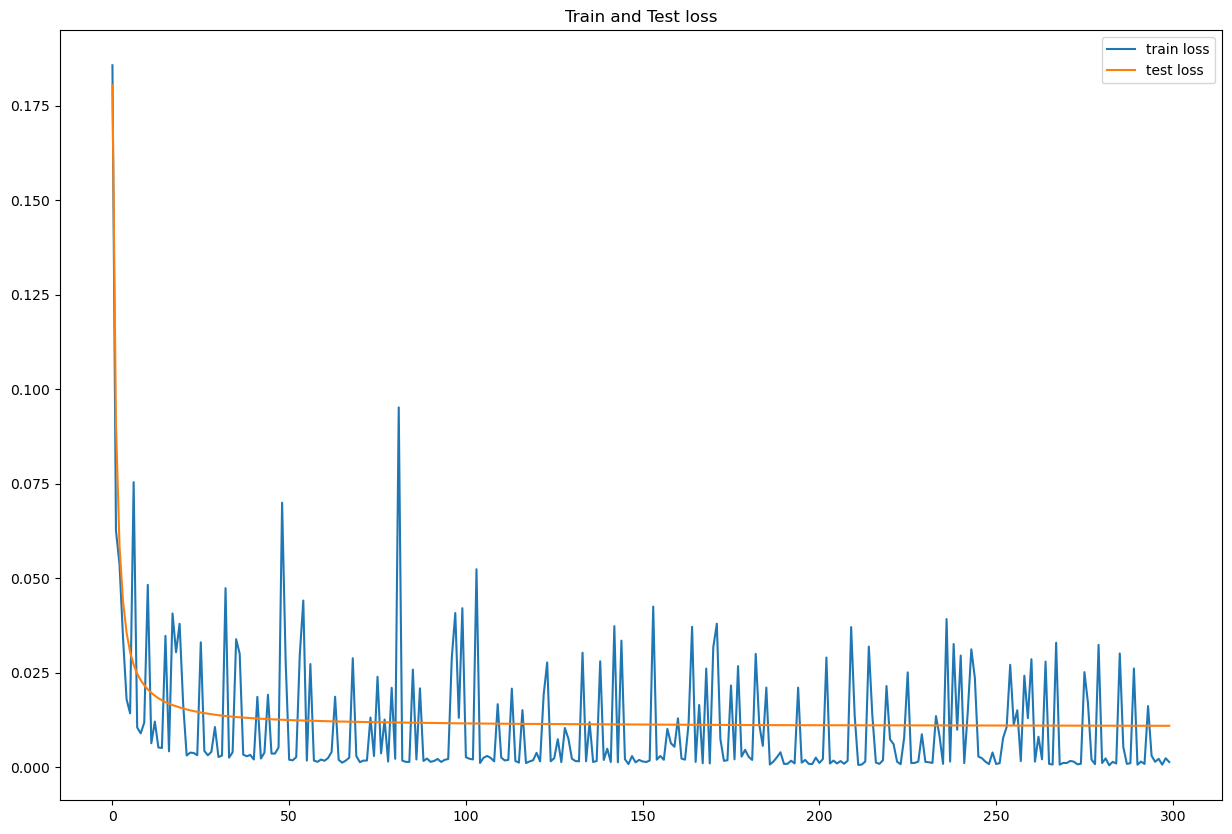

In [27]:
fig = plt.figure(figsize=(15, 10))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title('Train and Test loss')
plt.legend()
plt.show()

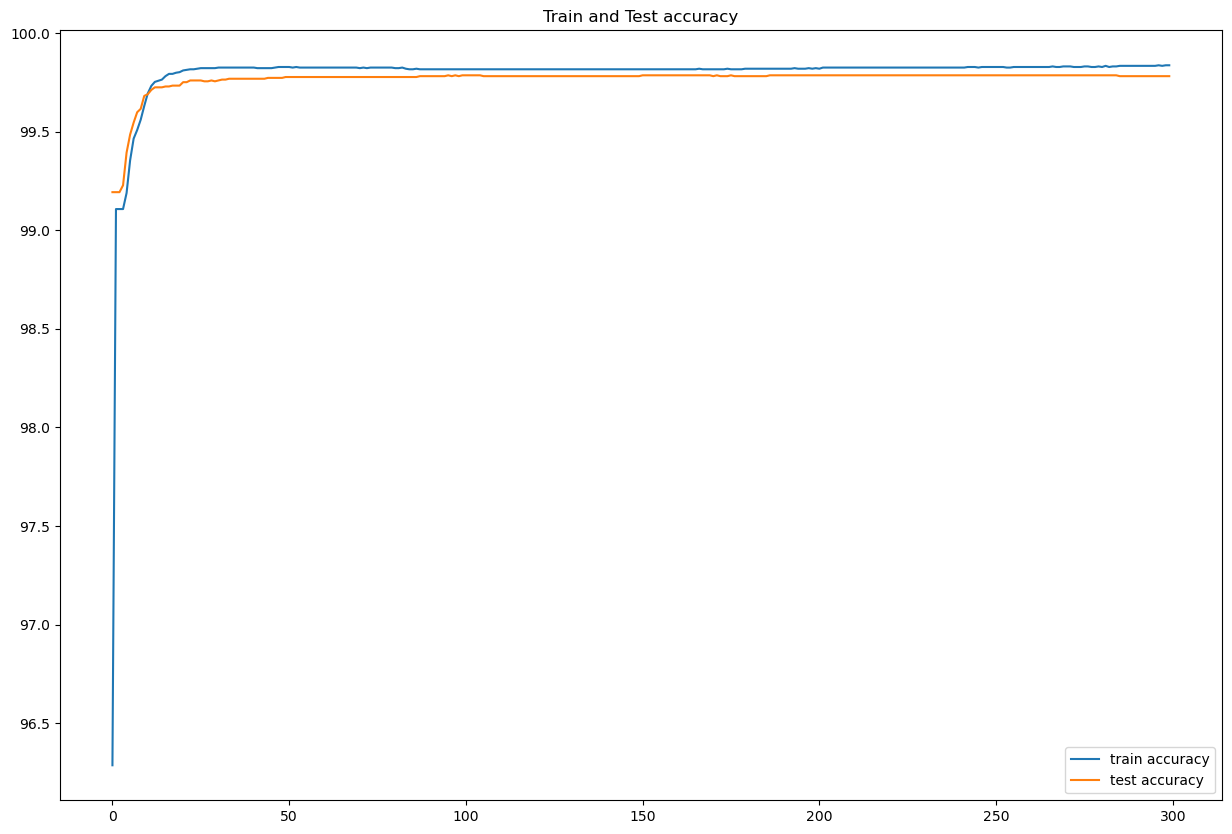

In [28]:
fig = plt.figure(figsize=(15, 10))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title('Train and Test accuracy')
plt.legend()
plt.show()

## Conclusion:
<li> The given dataset had a class imbalance which was handled using SMOTE (Synthetic Minority Oversampling) technique. This helps in having a balanced dataset and avoid model overfitting.</li>
<li> The PyTorch model has a training loss and validation/test loss decreasing as the epoch increases and both go hand in hand which indicates that the model is performing well. </li>
<li> The PyTorch model's test accuracy has almost reached 100% (somewhere between 99.5% and 100%) and the difference between training and test accuracy is very less, which again shows how well the model is performing from the data it learnt and predicting new transaction as fraud or not. </li>